In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors  import KNeighborsClassifier
from sklearn import preprocessing
from keras.utils import to_categorical
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report

In [2]:
diabetes_data=pd.read_csv("diabetes_data old.csv")
diabetes_data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,58.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
1036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1037,32.0,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
1038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
diabetes_data.shape

(1040, 17)

In [4]:
diabetes_data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 520 non-null    float64
 1   Gender              520 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            520 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    520 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class 

In [6]:
diabetes_data.nunique()

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

In [7]:
data_1=diabetes_data.copy()

In [8]:
data_1

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,58.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
1036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1037,32.0,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
1038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
column_name = 'Age'  # Name of the column containing NaN values

# Replace NaN values with the median of the column
median_value = data_1[column_name].median()
data_1[column_name].fillna(median_value, inplace=True)
data_1[column_name]=data_1[column_name].round().astype(int)

In [10]:
data_1

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
2,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
4,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
1036,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1037,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
1038,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the dataset
for column in data_1.columns:
    # Convert the column to string if it contains mixed types
    if data_1[column].dtype != 'object':
        data_1[column] = data_1[column].astype(str)
    
    # Apply label encoding
    data_1[column] = label_encoder.fit_transform(data_1[column])


In [12]:
data_1

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
2,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
4,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,34,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
1036,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1037,8,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
1038,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [13]:
data_1.nunique()

Age                   51
Gender                 3
Polyuria               3
Polydipsia             3
sudden weight loss     3
weakness               3
Polyphagia             3
Genital thrush         3
visual blurring        3
Itching                3
Irritability           3
delayed healing        3
partial paresis        3
muscle stiffness       3
Alopecia               3
Obesity                3
class                  3
dtype: int64

In [14]:
data_1.to_csv('new_data.csv', index=False)

In [17]:
# checking for duplicates
duplicate=data_1.duplicated()
duplicate_count=sum(data_1.duplicated())
print("there are",duplicate_count,"duplicates in the dataset")
if duplicate_count>0:
    print("duplicate data: ",data_1[duplicate])

there are 788 duplicates in the dataset
duplicate data:        Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
2      24       2         2           2                   2         2   
4      24       2         2           2                   2         2   
6      24       2         2           2                   2         2   
8      24       2         2           2                   2         2   
10     24       2         2           2                   2         2   
...   ...     ...       ...         ...                 ...       ...   
1030   24       2         2           2                   2         2   
1032   24       2         2           2                   2         2   
1034   24       2         2           2                   2         2   
1036   24       2         2           2                   2         2   
1038   24       2         2           2                   2         2   

      Polyphagia  Genital thrush  visual blurring  Itching  Irrita

In [20]:
X=data_1.iloc[:,:-1]
Y=data_1.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [21]:
X_train

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
393,42,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0
903,36,0,1,1,1,1,1,0,1,1,0,1,1,1,0,1
647,20,1,1,0,1,1,0,1,0,1,0,1,0,0,1,1
754,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
47,24,1,0,1,1,1,0,0,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,34,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1
757,23,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1025,19,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
987,20,1,1,0,1,1,0,1,0,1,0,1,0,0,1,1


In [22]:
Y_train

393     1
903     1
647     0
754     2
47      1
       ..
709     0
757     1
1025    0
987     0
587     0
Name: class, Length: 832, dtype: int32

In [23]:
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
2,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
4,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,34,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
1036,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1037,8,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0
1038,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [24]:
Y

0       2
1       1
2       2
3       1
4       2
       ..
1035    1
1036    2
1037    0
1038    2
1039    0
Name: class, Length: 1040, dtype: int32

In [25]:
data=data_1.copy()

In [26]:
from sklearn.preprocessing import OneHotEncoder
# Step 1: Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col])

# Step 2: Perform one-hot encoding for categorical variables (optional)
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
data_encoded = onehot_encoder.fit_transform(data)

C:\Users\jayas\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
print(data.columns)

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


In [28]:
data.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,23.952885,1.315385,1.248077,1.224038,1.208654,1.293269,1.227885,1.111538,1.224038,1.243269,1.121154,1.229808,1.215385,1.187500,1.172115,1.084615,1.307692
std,8.307880,0.765318,0.831291,0.852330,0.865176,0.788239,0.849045,0.936410,0.852330,0.835597,0.930054,0.847391,0.859613,0.882095,0.893884,0.953467,0.773439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.750000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,24.000000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000
75%,24.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,50.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [29]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
2,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
4,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,34,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
1036,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1037,8,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
1038,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [33]:
def pair_plot(data):
    plt.figure()
    pair_plot = sns.pairplot(data=data,            
                        height=3,
                        hue='class',  
                        diag_kind='kde')
    pair_plot.fig.suptitle("Pairplot of all features")
    plt.show()

In [34]:
def plot_confusionMatrix(data):
    sns.set(font_scale=1.15)                                    # Set aesthetic parameters in one step.
    ax = plt.figure(figsize=(10, 8))                            #set figure size   https://seaborn.pydata.org/generated/seaborn.set.html
    plt.title("Confusion Matrix of all features")
    sns.heatmap(data.corr(),                                    # input correlation matrix  of dataset
              vmax=1.0,                                       #Values to anchor the colormap, otherwise they are inferred from
                                                              #the data and other keyword arguments.
              vmin=0.0,
              linewidths=0.01,
              square=False,                                   #If True, set the Axes aspect to “equal” so each cell will be square-shaped.
              annot=True,                                     #If True, write the data value in each cell. 
              linecolor="black")                              #Color of the lines that will divide each cell.            
                                                              #https://seaborn.pydata.org/generated/seaborn.heatmap.html
    b, t = plt.ylim()                                           # discover the values for bottom and top
    b += 0.5                                                    # Add 0.5 to the bottom
    t -= 0.5                                                    # Subtract 0.5 from the top
    plt.ylim(b, t) 

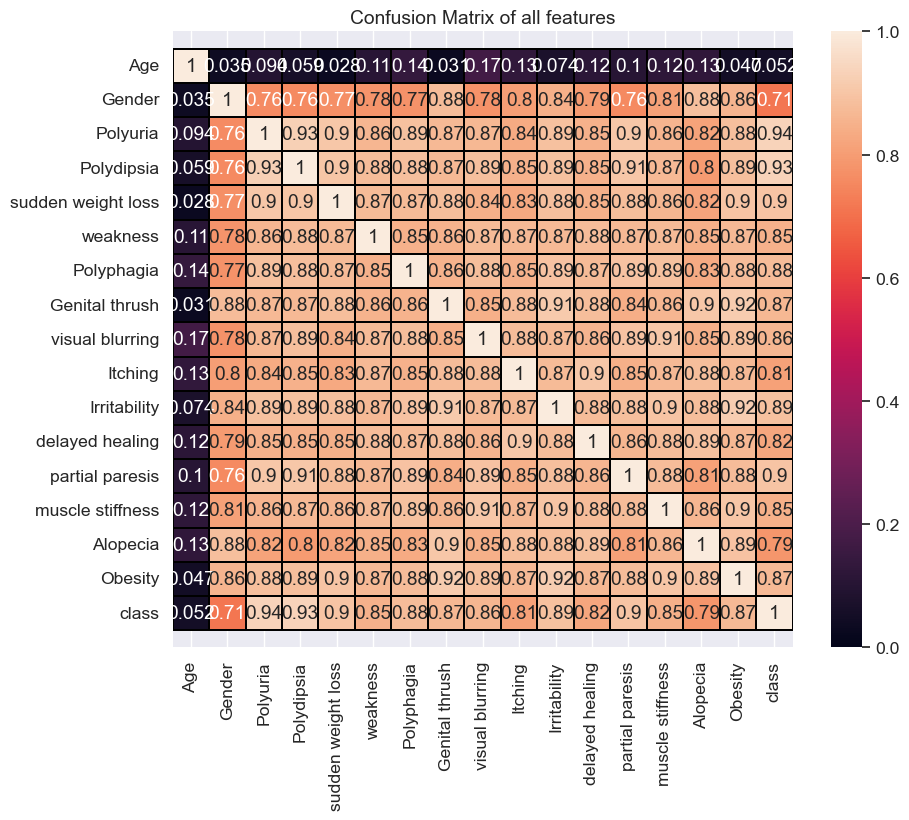

In [35]:
plot_confusionMatrix(data)

In [36]:
def dist_Plot(data):
    # Get all column names except the target column (assuming it's the last column)
    feature_columns = data.columns[:-1]
    # Create subplots
    fig, axes = plt.subplots(len(feature_columns), 1, figsize=(10, 20))
    # Plot distplot for each feature
    for i, feature in enumerate(feature_columns):
        ax = axes[i]
        sns.histplot(data=data, x=feature, kde=True, ax=ax)
        ax.set_title(feature)
    # Adjust subplot spacing
    fig.suptitle("Gaussian Distribution of all features")
    plt.tight_layout()
    # Show the plots
    plt.show()

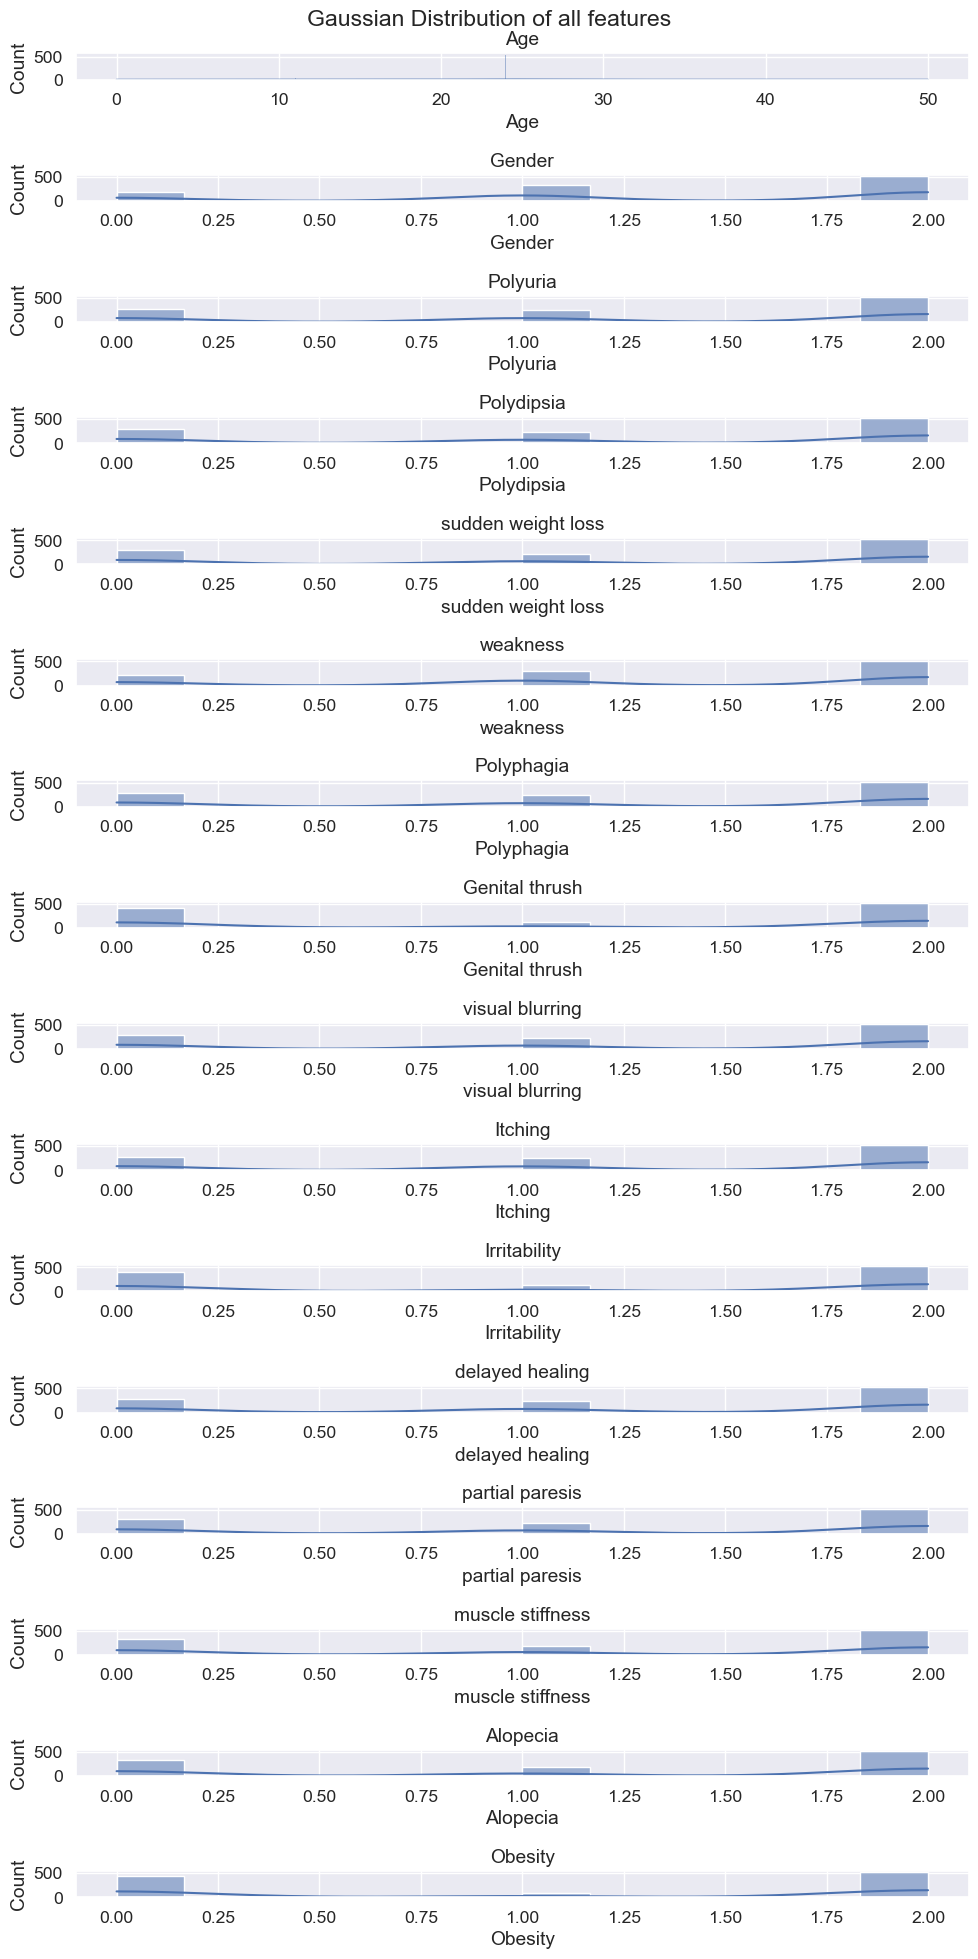

In [37]:
dist_Plot(data)

In [38]:
def plot_violinplot_all_features(data):
    # Get all column names except the target column (assuming it's the last column)
    feature_columns = data.columns[:-1]
    # Create subplots
    fig, axes = plt.subplots(len(feature_columns), 1, figsize=(10, 20))
    # Plot violin plot for each feature
    for i, feature in enumerate(feature_columns):
        ax = axes[i]
        sns.violinplot(data=data, x=feature, ax=ax)
        ax.set_title(feature)
    # Adjust subplot spacing
    plt.tight_layout()
    # Show the plots
    plt.show()

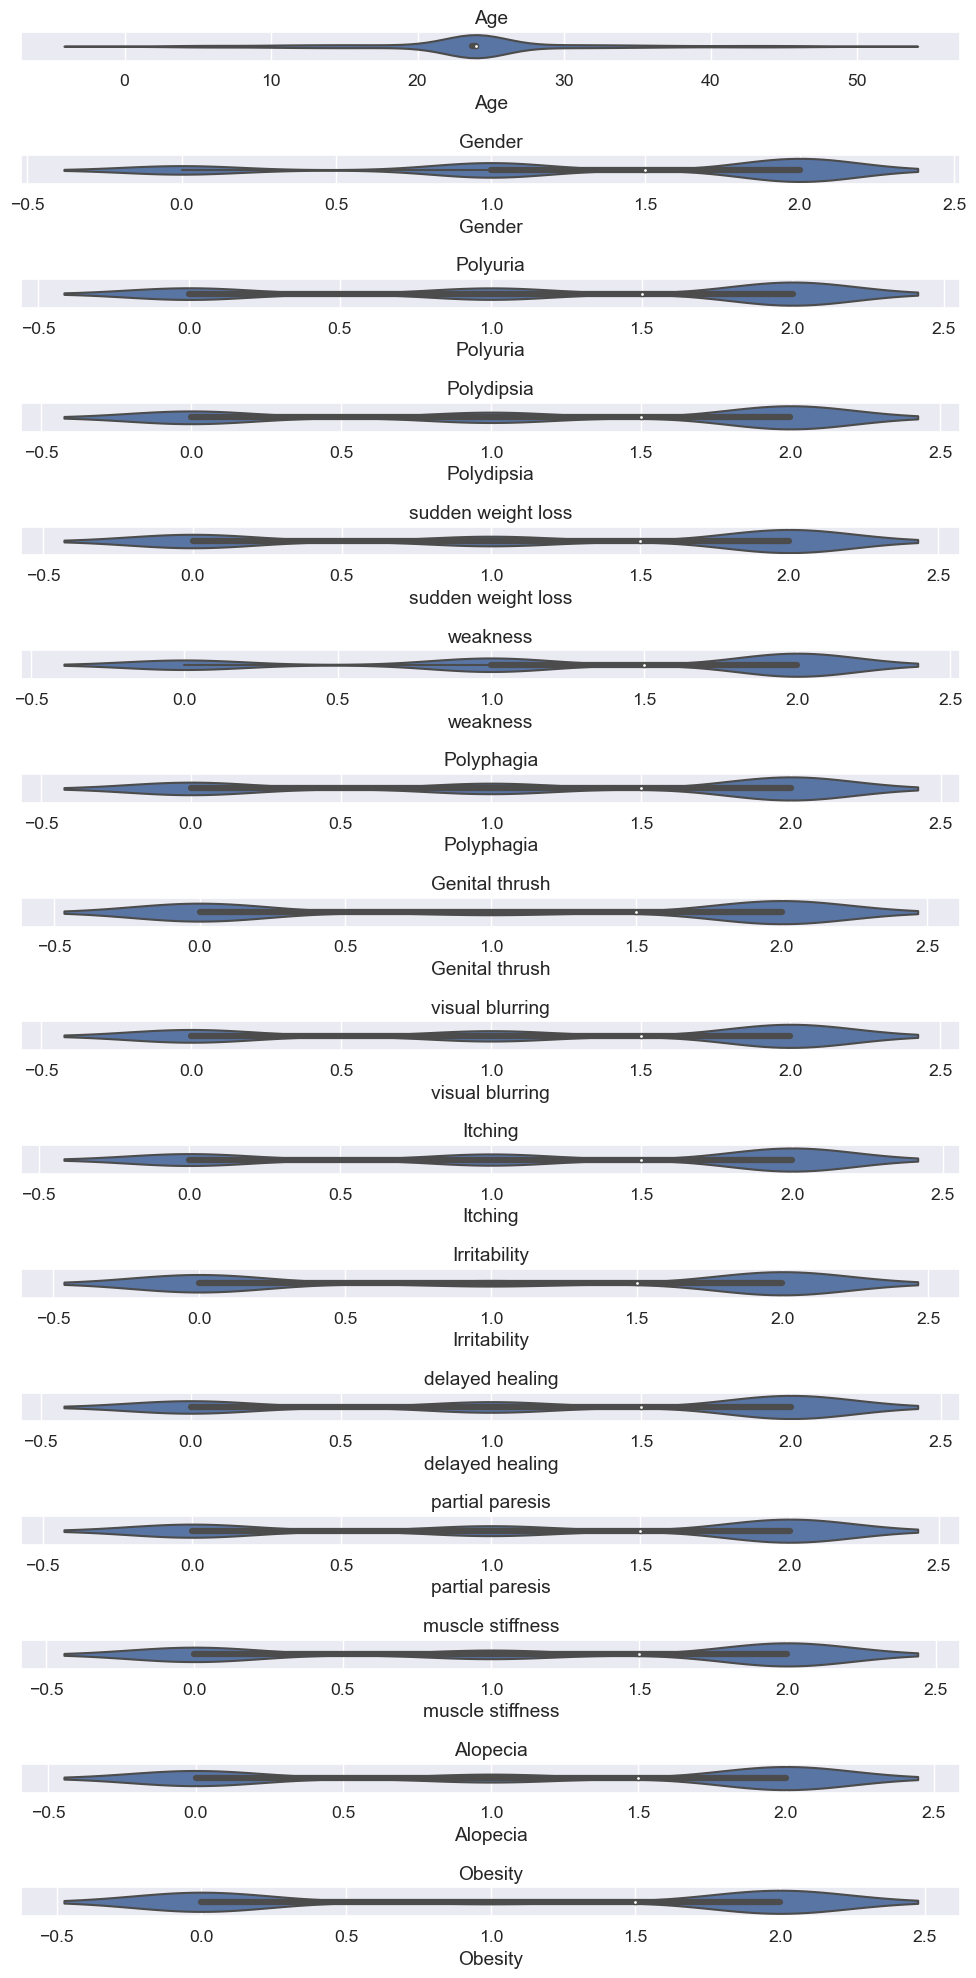

In [39]:
plot_violinplot_all_features(data)

In [40]:
def fix_outliers(data):
    # Identify numeric columns with potential outliers
    numeric_columns = ['Age', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 
                       'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 
                       'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

    for column in numeric_columns:
        # Manually identify and replace outliers
        if column == 'Age':
            # Fix outliers in the 'Age' column
            data.loc[data['Age'] > 100, 'Age'] = 100  # Replace values greater than 100 with 100
        elif column == 'Obesity':
            # Fix outliers in the 'Obesity' column
            data.loc[data['Obesity'] > 50, 'Obesity'] = 50  # Replace values greater than 50 with 50
        else:
            # Fix outliers in other numeric columns
            # Add your custom logic here to identify and replace outliers for each column
            return data



fixed_data = fix_outliers(data)
print(fixed_data)


      Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0      24       2         2           2                   2         2   
1      16       1         0           1                   0         1   
2      24       2         2           2                   2         2   
3      34       1         0           0                   0         1   
4      24       2         2           2                   2         2   
...   ...     ...       ...         ...                 ...       ...   
1035   34       0         1           1                   1         1   
1036   24       2         2           2                   2         2   
1037    8       0         0           0                   0         1   
1038   24       2         2           2                   2         2   
1039   18       1         0           0                   0         0   

      Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0              2               2               

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 1040 non-null   int32
 1   Gender              1040 non-null   int32
 2   Polyuria            1040 non-null   int32
 3   Polydipsia          1040 non-null   int32
 4   sudden weight loss  1040 non-null   int32
 5   weakness            1040 non-null   int32
 6   Polyphagia          1040 non-null   int32
 7   Genital thrush      1040 non-null   int32
 8   visual blurring     1040 non-null   int32
 9   Itching             1040 non-null   int32
 10  Irritability        1040 non-null   int32
 11  delayed healing     1040 non-null   int32
 12  partial paresis     1040 non-null   int32
 13  muscle stiffness    1040 non-null   int32
 14  Alopecia            1040 non-null   int32
 15  Obesity             1040 non-null   int32
 16  class               1040 non-null   int32


In [42]:
# this function if for outlair rejection with
# respect to mean value
def IQR_Mean (data):
    for i in range(8): 
        x = data[Renamed_feature[i]]
        Q1 = x.quantile(0.25)                                   # Q1 is the "middle" value in the first half of the rank-ordered data set.
        Q3 = x.quantile(0.75)                                   # Q3 is the "middle" value in the second half of the rank-ordered data set.
        IQR = Q3-Q1                                             # The interquartile range is equal to Q3 minus Q1.
        mean = x.mean()                                         #mean of feature 
        for j in range(569):                                    # loop for first 569 elements of feature
            temp = x[j]                                           # every feature value
            LW = (Q1 - 1.5 * IQR)                                 #lower considerable range of gaussian distribution
            UW = (Q3 + 1.5 * IQR)                                 #upper considerable range of gaussian distribution
            if temp < LW:                                         #replace upper value with mean
                x[j] = mean
            if temp > UW:                                         #replace lower value with mean
                x[j] = mean
        data[Renamed_feature[i]] = x
    return data

In [43]:
# this function if for outlair rejection with
# 1.5 times of IQR that means that are
# significant in gaussian distribution
def IQR (data):
    for i in range(8):                                        # for every feature
        Q1 = data[Renamed_feature[i]].quantile(0.25)
        Q3 = data[Renamed_feature[i]].quantile(0.75)
        IQR = Q3-Q1                                             #find IQR
        LW = (Q1 - 1.5 * IQR)                                   #find lower boundary
          # print(LW)
        UW = (Q3 + 1.5 * IQR)                                   #find upper boundary
          # print(UW)
        data = data[data[Renamed_feature[i]]<UW]                #drop greater than upper limit
        data = data[data[Renamed_feature[i]]>LW]                #drop smaller than lower limit
    return data

In [44]:
def outlier_Rejection (data, iqr_Mean, iqr_Medain, iqr, manual):
    if iqr_Mean == True:                                     #reject outleir with Mean
        data = IQR_Mean (data)
    if iqr_Medain == True:                                   #reject outleir with Median
        data = IQR_Medain (data)
    if iqr == True:                                          #reject outleir in IQR range
        data = IQR (data)
    if manual == True:                                       #reject outleir with manual
        data = Manual (data)
    return data


In [45]:
def creat_Model (classifier, X_Train, Y_Train, tuned_parameters, verbose):
    clf = GridSearchCV(classifier,
                    tuned_parameters,
                    verbose=verbose,
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1)
    clf.fit(X_Train, Y_Train)
    return clf

In [46]:
def average_performance(aucs,Accuracy,TP,TN,FP,FN):
    print()
    n_dotsav=(n_dots-len('Average'))//2
    print('-'*n_dotsav+'Average'+'-'*n_dotsav)
    print("AUC (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(aucs),np.std(aucs)))
    print("Accuracy (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(Accuracy),np.std(Accuracy)))
    cm = [[int(np.mean(TP)), int(np.mean(FP))],[int(np.mean(FN)), int(np.mean(TN))]]
    print ('Avg. CM is '+str(cm))
    cm = [[int(np.sum(TP)), int(np.sum(FP))],[int(np.sum(FN)), int(np.sum(TN))]]
    print ('Total for all folds CM is '+str(cm))
    re_auc=str(round(np.mean(aucs), 3))+'+/-'+str(round(np.std(aucs),3))
    all_clf_res.append(re_auc)

In [47]:
def plot_Current_ROC(fpr,tpr,iterator,roc_auc):
    plt.plot(fpr,
          tpr,
          # Color[iterator],
          alpha=0.35,
          # label='macro-average ROC (AUC = {0:0.3f})'.format(roc_auc)
          # +FOLD[iterator],
          linewidth=1)

In [48]:
def metrics (y_true, y_pred, probas_):
    points=n_dots*'-'
    print(points)
#    print("Best parameters set found on development set:")
#    print(clf.best_params_)
    fpr, tpr, thresholds = roc_curve(y_true, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
  #  aucs.append(roc_auc)
    print("Detailed classification report for current fold:")
    print()
    print(classification_report(y_true, y_pred))
    print()
    print("Area Under ROC (AUC): {}".format(roc_auc))
    print()
    print('Confusion Matrix for current fold: ')
    print(confusion_matrix(y_true, y_pred))
    print()
    print("Accuracy for Current Fold: {}".format(accuracy_score(y_true, y_pred)))
    print()
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return  tn, fp, fn, tp, roc_auc, fpr, tpr

In [49]:
def average_ROC(mean_fpr,tprs,aucs,TP,TN,FP,FN):
    sen = (np.sum(TP))/(np.sum(TP)+np.sum(FN))
    spe = (np.sum(TN))/(np.sum(TN)+np.sum(FP))

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
  # mean_auc = auc(mean_fpr, mean_tpr)
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
  # plt.figure(figsize=(8, 5))
  # plt.grid(True)
    ax = plt.axes()
    ax.grid(color='lightgray', linestyle='-', linewidth=.5)
  # Setting the background color
    ax.set_facecolor("white")
    ax.spines['bottom'].set_color('#000000')
    ax.spines['top'].set_color('#000000') 
    ax.spines['right'].set_color('#000000')
    ax.spines['left'].set_color('#000000')
    plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Avg. ROC (AUC (avg $\pm$ std) = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)
    plt.scatter((1-spe), sen, s=80, c='r', marker='x',)
    plt.scatter(0, sen, s=80, c='r', marker='x',)
    plt.scatter((1-spe),0, s=80, c='r', marker='x',)
    plt.axhline(y=sen, color='r', linestyle='--')
    plt.axvline(x=(1-spe), color='r', linestyle='--')
    plt.text((1-spe), 0.02, "FPR={:0.3f}".format((1-spe)))
    plt.text(0.009, sen+0.05, "TPR={:0.3f}".format(sen))
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='darkgray', alpha=0.5,
                  label=r'$\pm$ 1 Standard deviation')
    plt.xticks(np.arange(0.0, 1.01, step=0.1))
    plt.yticks(np.arange(0.0, 1.01, step=0.1))
    left=0.0
    right=1.0
    plt.xlim(left, right)
    plt.ylim(left, right)
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc="lower right")
  # plt.grid(True)
    plt.show() 


In [50]:
print(data.columns)

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


In [51]:

# Assuming you have a DataFrame called 'data'
column_names = data.columns.tolist()

# Check if column names are present in the DataFrame
missing_columns = [col for col in column_names if col not in data.columns]

if len(missing_columns) > 0:
    print("Missing columns:", missing_columns)
else:
    print("All columns are present in the DataFrame")


All columns are present in the DataFrame


In [52]:

def feature_selector(data, algo, n_feature):

    if algo == 'lasso':
        X = data.drop('class', axis=1)  
        y = data['class'] 
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        lasso = Lasso(alpha=0.1)  # Adjust the regularization parameter alpha as needed
        lasso.fit(X_train, y_train)

        # Get the non-zero coefficient indices
        selected_features = X.columns[lasso.coef_ != 0]
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]
        
        lasso_selected = Lasso(alpha=0.1)
        lasso_selected.fit(X_train_selected, y_train)
        y_pred = lasso_selected.predict(X_test_selected)
        
        accuracy = accuracy_score(y_test, y_pred.round())
        print("Accuracy: {:.2f}%".format(accuracy * 100))
        
        X_Data = X_train_selected
        Y_Lavel = y_train
    return X_Data, Y_Lavel



In [53]:
X_Data=data.iloc[:,:-1]
Y_Lavel=data.iloc[:,-1]

In [54]:
display(X_Data)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
2,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
4,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,34,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
1036,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1037,8,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0
1038,24,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [55]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [56]:
# knn model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.9134615384615384


In [57]:
# Using Xgboost
import xgboost as xgb
model4 = xgb.XGBClassifier(random_state=1)
model4.fit(X_train, Y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.9759615384615384
